### Portuguese Wine: Predicting Red Vinho Verde's Quality based on its Chemical Properties 🍷

In [1]:
# Importing packages
import pandas as pd
import seaborn as sns

In [2]:
# Reading the CSV file that contains the wine data and saving it in the 'df' variable
df = pd.read_csv("winequality-red.csv", delimiter=',')

In [3]:
# Viewing the dataframe of the csv file saved in the 'df' variable
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7:04,0:07,0,1:09,0.076,11,34,6.929167,3:51,0:56,9:04,5
1,7:08,0.061111111,0,2:06,0.098,25,67,6.922222,3:02,0.047222222,9:08,5
2,7:08,0.052777778,0:04,2:03,0.092,15,54,0.692361,3:26,0.045138889,9:08,5
3,11:02,0:28,0:56,1:09,0.075,17,60,0.693056,3:16,0:58,9:08,6
4,7:04,0:07,0,1:09,0.076,11,34,6.929167,3:51,0:56,9:04,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6:02,0:06,0:08,2,0:09,32,44,6.909028,3:45,0:58,10:05,5
1595,5:09,0:55,0:01,2:02,0.062,39,51,0.995120,3:52,0.052777778,11:02,6
1596,6:03,0:51,0:13,2:03,0.076,29,40,0.995740,3:42,0.052083333,11,6
1597,5:09,0.447916667,0:12,2,0.075,32,44,0.995470,3:57,0.049305556,10:02,5


In [4]:
# Viewing the first five rows of the dataframe in the CSV file
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7:04,0:07,0,1:09,0.076,11,34,6.929167,3:51,0:56,9:04,5
1,7:08,0.061111111,0,2:06,0.098,25,67,6.922222,3:02,0.047222222,9:08,5
2,7:08,0.052777778,0:04,2:03,0.092,15,54,0.692361,3:26,0.045138889,9:08,5
3,11:02,0:28,0:56,1:09,0.075,17,60,0.693056,3:16,0:58,9:08,6
4,7:04,0:07,0,1:09,0.076,11,34,6.929167,3:51,0:56,9:04,5


<b>2.</b> Initial Exploratory Data Analysis (EDA):

In [5]:
# EDA Using Pandas Profiling
from ydata_profiling import ProfileReport

In [6]:
# Producing and visualizing the report
profile = ProfileReport(df, title='Portuguese Red Wine Pandas Profiling Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# EDA Using Sweetviz
import sweetviz as sv

In [8]:
# Producing the report
report = sv.analyze(df)

# Visualizing the report
report.show_html()

C:\Users\tarur\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\tarur\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\tarur\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\tarur\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\tarur\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\tarur\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instea

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>3.</b> Data Cleansing and Preparation

In [9]:
# Dealing with column names
import janitor as jn

In [10]:
# Showing the column names, as they are originally
df["id"]=df.index
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')

In [11]:
# Using janitor to clean up the column names and showing them after cleaning
df=jn.clean_names(df)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')

In [12]:
# Calculating ID-ness to remove variables with a too high ID-ness value
df.nunique()/df.count()

fixed_acidity           0.060038
volatile_acidity        0.089431
citric_acid             0.045654
residual_sugar          0.056285
chlorides               0.095059
free_sulfur_dioxide     0.037523
total_sulfur_dioxide    0.090056
density                 0.272670
ph                      0.050657
sulphates               0.058787
alcohol                 0.040025
quality                 0.003752
id                      1.000000
dtype: float64

In [13]:
# The ID column must go, because its IDness value is too high
# Let's set as a roof for maximum IDness 0.9
df = df[df.columns[df.nunique()/df.count() <= 0.9]]

In [14]:
# As we can see now, ID was removed from the dataframe
# These are the columns of the dataframe after this previous treatment
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
# Describe the dataset to assess the dataset's simple statistics
# Possibily, identify strange values
df.describe()

,density,quality
count,1599.000000,1599.000000
mean,3.545370,5.636023
std,2.952843,0.807569
min,0.690278,3.000000
25%,0.995745,5.000000
50%,0.998550,6.000000
75%,6.922222,6.000000
max,6.943750,8.000000


In [16]:
# Import the necessary packages to handle missing values
import numpy as np

# As it was possible to observe in previous reports, there are no missing values in the dataset
# Let's just check one more time if there really aren't any
df.iloc[:, :].isnull().sum()

# Here we were able to confirm that we don't need to deal with the missing values, because there are none

# If we had to deal with missing values, though, we would take into consideration three things:
#    1. If a variable has more than 60–70% of missing values, one should consider dropping it.
#    2. On the other hand, "Schafer asserted that a missing rate of 5% or less is inconsequential".
#    3. When the % of missings is < 60-70%, we do not drop the variables, but it is still necessary to hadle their missing values.
#       For that, we could apply the mean or mode (etc.).

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

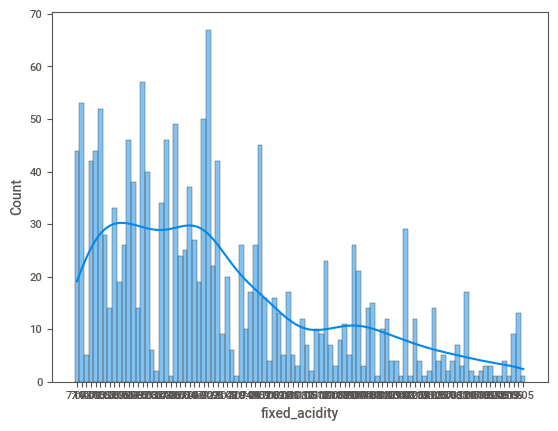

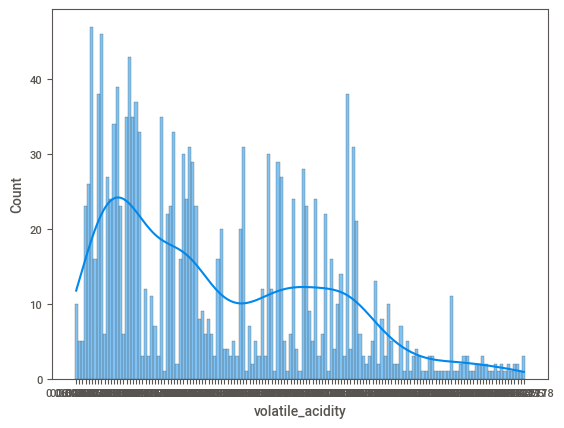

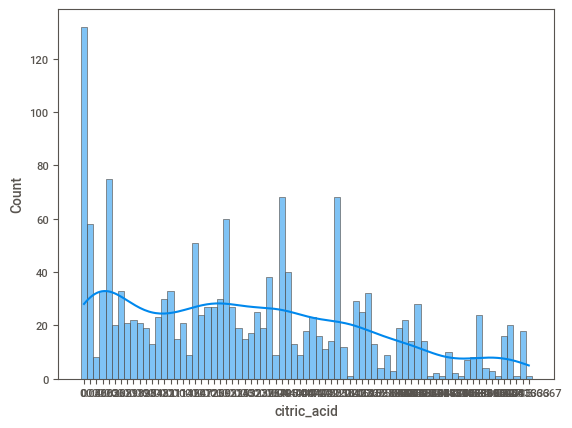

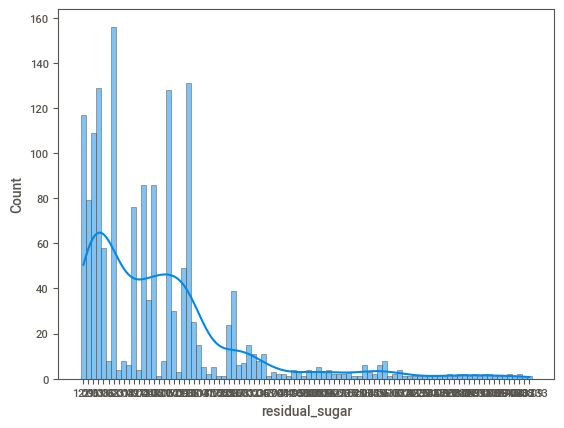

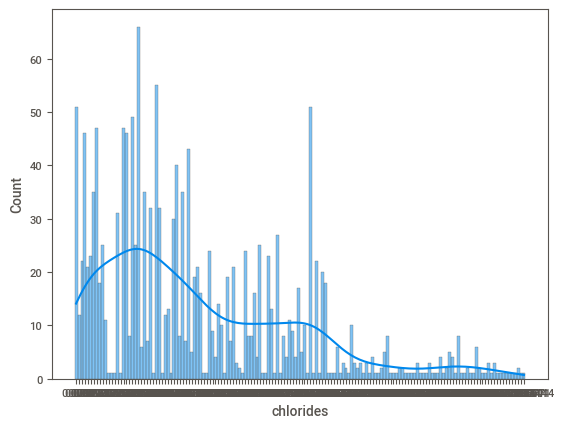

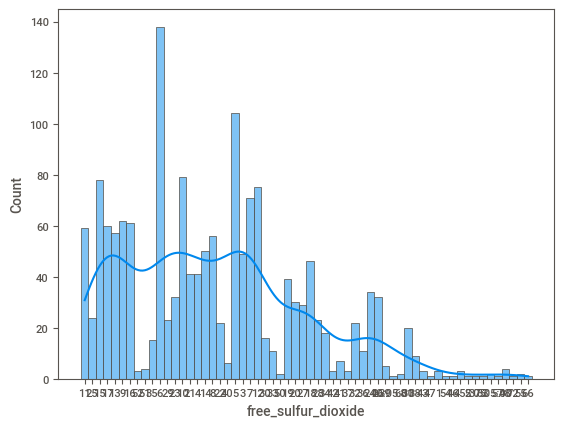

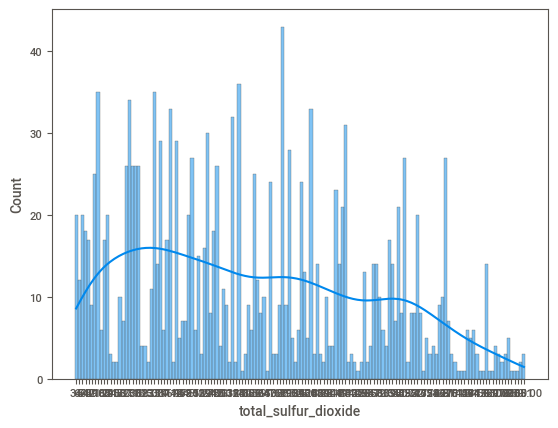

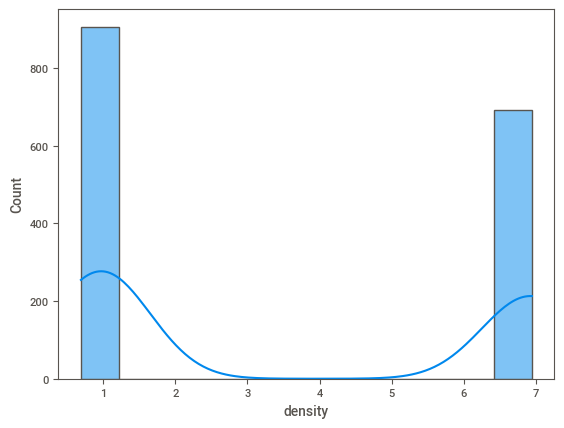

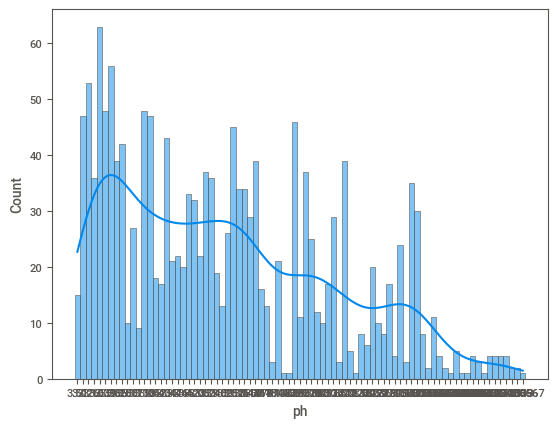

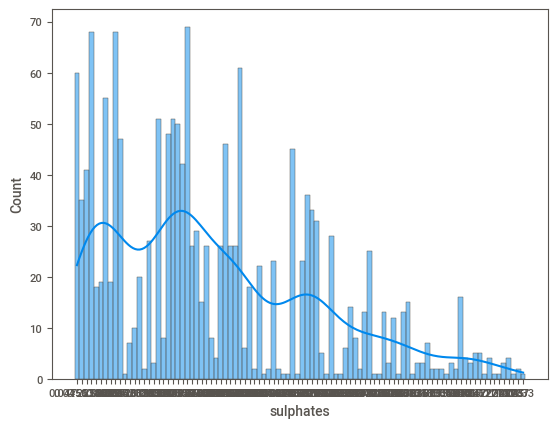

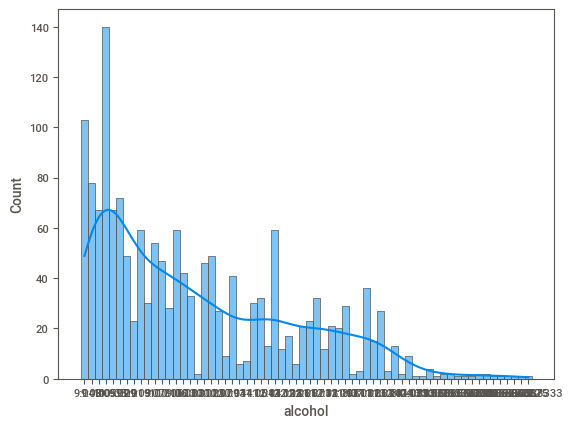

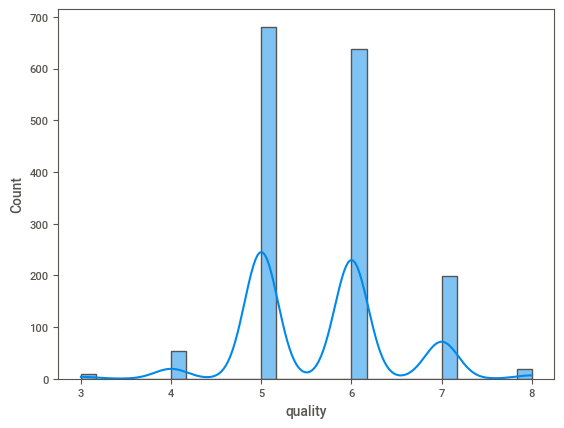

In [17]:
# Now, let's check for outliers by assessing the distribution of the numerical variables
import matplotlib.pyplot as plt
%matplotlib inline

for column in df.columns:
    fig, ax = plt.subplots()
    sns.histplot(data=df, x=column, kde=True)

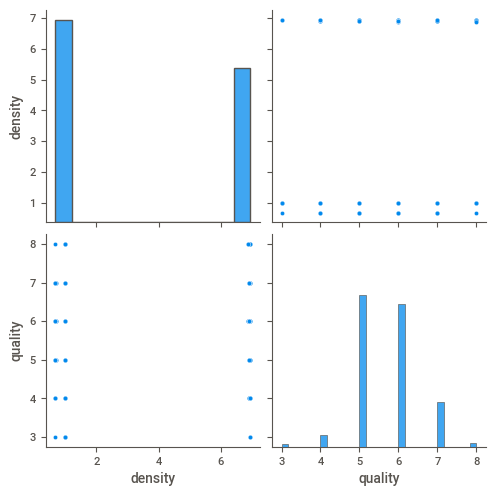

In [18]:
# Let's explore the relationships between variables to try to see patterns, using the pairplot
sns.pairplot(df)

In [19]:
# Let's check for the variables' granularity now
# When the granularity of a variable is too high, we should consider merging values to create groups
# As an example, let's group the values within the 'ph' variable
df.ph.value_counts()

3:03           63
3:36           56
3:26           53
3:38           48
3:39           48
               ..
0.14375         1
0.177083333     1
0.184027778     1
0.134722222     1
2:09            1
Name: ph, Length: 81, dtype: int64

In [20]:
# In general, all wines are acidic
# Usually, a wine will fall between 3 to 4 on the pH scale (which ranges from 0 to 14)
# Red wines are generally less acidic, falling between 3.3 and 3.6
# (source: https://sensorex.com/ph-improve-taste-color-wine/)

# As we were able to see before, our dataset's pH values range from 2.74 to 4.01
# So, as an example, let's create 2 groups to assess how many wines have below or above average pH: 
#   Group 1: "Below average pH", from 2.74 to 3.30
#   Group 2: "Above average pH", from 3.60 to 4.01
# (Average pH is from 3.30 to 3.60)

conditions = [
    (df["ph"].lt(3.30)),
    (df["ph"].gt(3.60))]
choices = ["Below average pH", "Above average pH"]

TypeError: '<' not supported between instances of 'str' and 'float'

In [21]:
# Let's view the generated groups
df["ph_rc"] = np.select(conditions, choices)
df.ph_rc.value_counts()

# As we can see, a big quantity of the wines have a pH below average.

NameError: name 'conditions' is not defined

In [22]:
# Let's plot the results of the groups

# Import necessary packages
import matplotlib.pyplot as plt
%matplotlib inline

#Define nr. of rows and columns
number_of_columns=2
number_of_rows=3

# Build the plot
df2 = df[["ph","ph_rc"]]
df2 = df2.applymap(str)
l=df2.columns
plt.figure(figsize=(5*number_of_columns,8*number_of_rows))
for i in range(0,2):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('darkgrid')
    sns.countplot(x=l[i], data=df)
    plt.tight_layout()

KeyError: "['ph_rc'] not in index"

In [23]:
# Feature selection
# Defining X and y
X = df.iloc[:,0:11] # independent
y = df.iloc[:,-2] 

In [24]:
# Viewing X columns
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')

In [25]:
# Viewing X
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
# Viewing y
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [27]:
# Importing necessary methods
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Doing a Dataframe with the k-best features, considering the score function as being the Qui2.
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)

# Getting the score and p-values
dfscores = pd.DataFrame({'Score':fit.scores_,'pvalues':fit.pvalues_.round(4)})
dfcolumns = pd.DataFrame({'Spec':X.columns})

# Concatenating by column
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.nlargest(3,'Score')

,Spec,Score,pvalues
6,total_sulfur_dioxide,2755.557984,0.0
5,free_sulfur_dioxide,161.936036,0.0
10,alcohol,46.429892,0.0


C:\Users\maria\AppData\Local\Temp\ipykernel_15292\3016116083.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.iloc[:, :].corr()


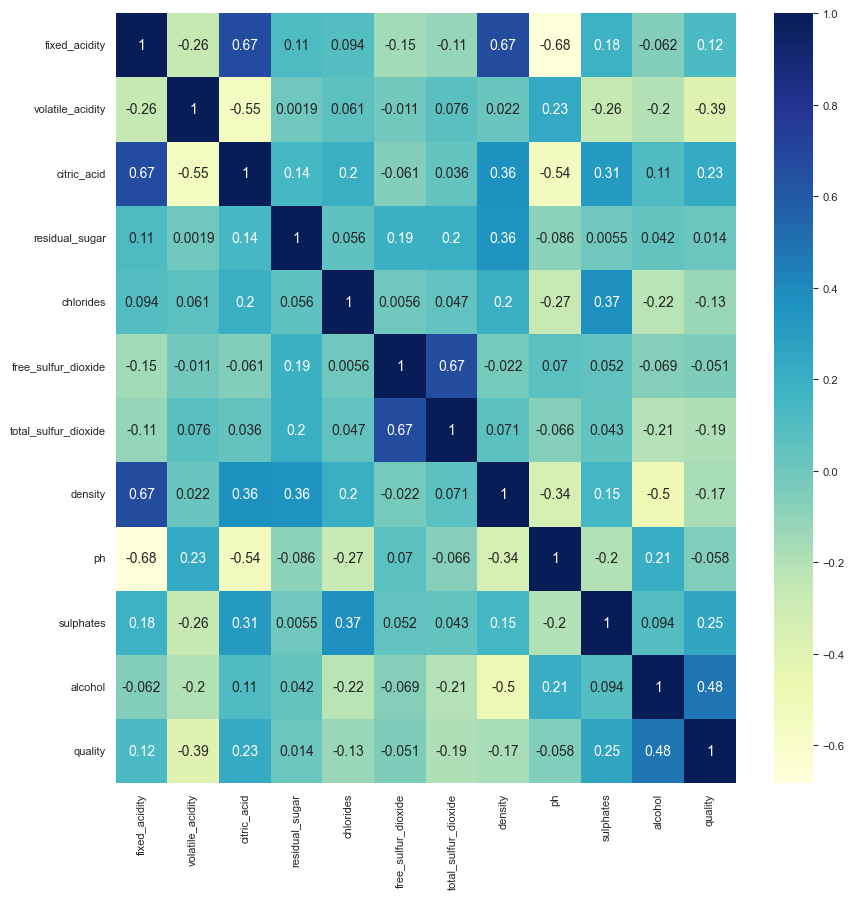

In [28]:
# Variables that are highly correlated must also be dealt with
# Feature selection with correlation matrix

plt.figure(figsize=(10,10))
corr_matrix = df.iloc[:, :].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [29]:
# Let's view the previous in a table format

# Calculating the correlation coefficients
corr_table = df.corr()

# Printing the correlation table
print(corr_table)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
ph                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

C:\Users\maria\AppData\Local\Temp\ipykernel_15292\4153892036.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table = df.corr()


In [30]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'ph_rc'],
      dtype='object')

In [31]:
# It is considered that a correlation higher than 0.7 r lower than -0.7 is too high
# Therefore, if we had variables with such a correlation, we should remove them

# It is possible to observe that 'fixed_acidity' is highly correlated (aprox. 0.7) with
# three other variables, so let's remove it
# 'total_sulfur_dioxide' and 'free_sulfur_dioxide' are also highly correlated (aprox. 0.7)
# let's remove the second one
df.drop(df.columns[0],axis=1, inplace=True)
df.drop(df.columns[4],axis=1, inplace=True)

# Also, let's drop the 'ph_rc' varaible, once it was only created as a test/experiment
# and contains the same information as 'ph', which would result in redundant information
df.drop(df.columns[10],axis=1, inplace=True)

In [32]:
# Viewing the columns of the dataframe now, without the 3 dropped columns
df.columns

Index(['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

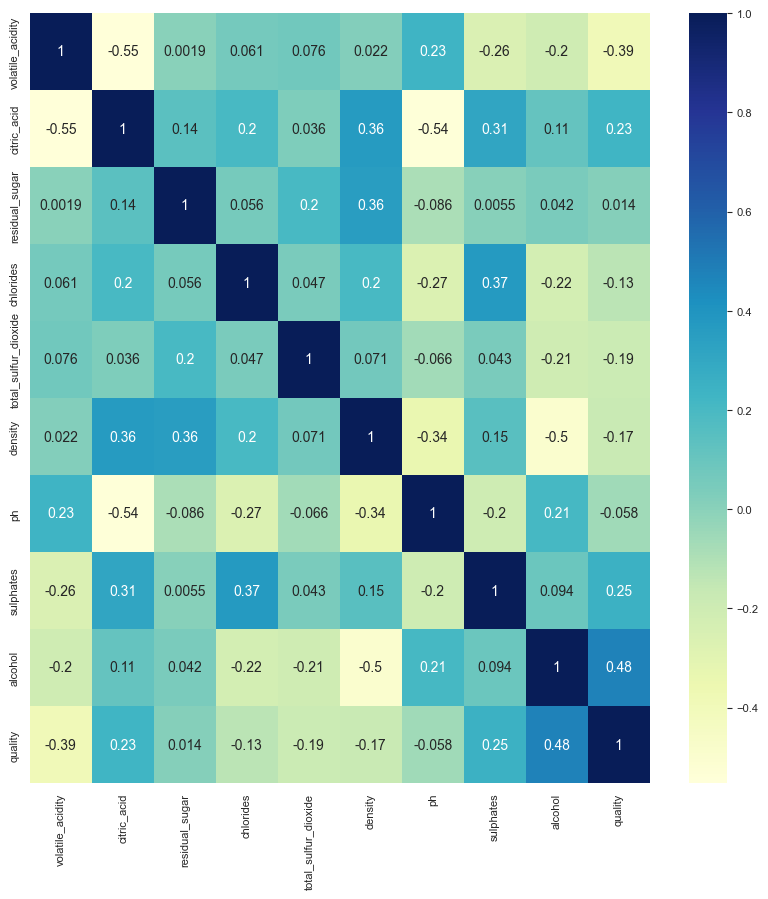

In [34]:
# Let's replot the correlation matrix to see the results now

plt.figure(figsize=(10,10))
corr_matrix = df.iloc[:, :].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# The results are now satisfying

In [35]:
# Feature selection using the wrapper method:
# Defining X and y
X = df.iloc[:,0:9] # independent
y = df.iloc[:,-1] 

In [36]:
# Viewing X columns
X.columns

Index(['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol'],
      dtype='object')

In [37]:
# Viewing X
X

,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [38]:
# Viewing y
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [39]:
# Importing methods
from sklearn.ensemble import ExtraTreesClassifier

# Fitting the data
model = ExtraTreesClassifier().fit(X,y)

In [40]:
# Listing the highest importance variable for the model
# These are the variables to create the linear regression model with
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4)

alcohol                 0.169302
total_sulfur_dioxide    0.123286
sulphates               0.121720
volatile_acidity        0.113986
dtype: float64

In [41]:
# Importing methods and packages
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import eli5

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
eli5.show_weights(lsvc, top=-1, feature_names = X.columns.tolist())

C:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<b>4.</b> Unsupervised Learning: Clustering

In [42]:
df.columns

Index(['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

C:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

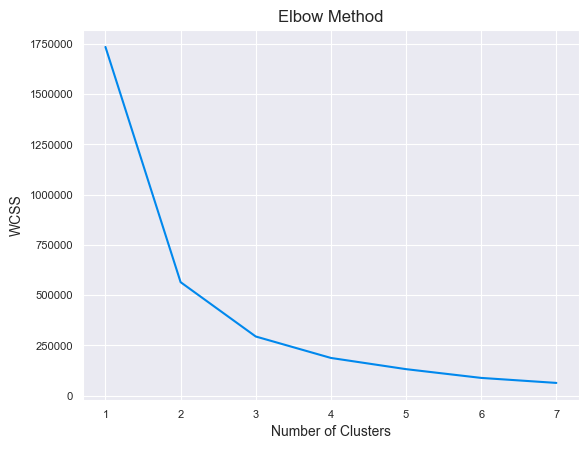

In [43]:
# Let's perform the cluster analysis
# Do do it, we must define a nr of clusters a priori
# To understand the optimal number of clusters, let's start by applying the elbow method
from sklearn.cluster import KMeans
# Extracting features
X = df.iloc[:,:-1].values

# Determining optimal number of clusters using elbow method
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting it
plt.plot(range(1,8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Looking at the results, it would make sense to go with 2 or 3 clusters.

C:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


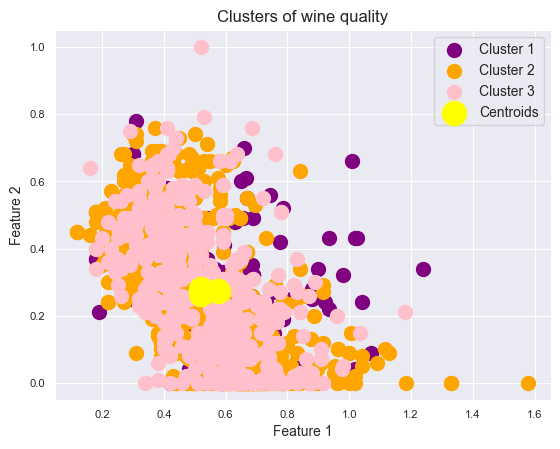

In [44]:
# Using k-means to do the clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of wine quality')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<b>5.</b> Regression Estimation

In [45]:
# Let's define X and y one last time, according to the best features for the model
# alcohol, sulphates, total_sulfur_dioxide and volatile_acidity
X = df.iloc[:,[0,4,7,8]] # independent
y = df.iloc[:,-1] 

In [46]:
# Viewing X columns
X.columns

Index(['volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'alcohol'], dtype='object')

In [47]:
# Viewing y
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [48]:
# Let's split the datasets into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train

,volatile_acidity,total_sulfur_dioxide,sulphates,alcohol
925,0.220,77.0,0.87,11.0
363,0.460,15.0,0.87,10.2
906,0.540,78.0,0.71,11.0
426,0.670,48.0,0.49,11.4
1251,0.580,60.0,0.59,9.8
...,...,...,...,...
1130,0.600,10.0,0.63,10.4
1294,0.635,60.0,0.75,10.9
860,0.620,85.0,0.54,9.5
1459,0.200,15.0,0.80,11.9


In [50]:
# Let's try linear regression, gradient boosting regression, 
# lasso regression, Decision tree regression and neural networks
# First, the linear regression

# Importing necessary methods
from sklearn.linear_model import LinearRegression

# Computing the linear regression
reg = LinearRegression()

# Fitting the linear regression model on the training data
res=reg.fit(X_train, y_train)

# Predicting using the trained model on the test data
y_pred = reg.predict(X_test)

# Viewing the regression's coefficients
coef = pd.DataFrame({'Variables':X.columns, 'Coefficients': reg.coef_})
print(coef)

              Variables  Coefficients
0      volatile_acidity     -1.147968
1  total_sulfur_dioxide     -0.002326
2             sulphates      0.618974
3               alcohol      0.307544


In [51]:
# Importing the 'mean_squared_error', 'mean_absolute_error' and 'r2_score'
# methods to evaluate the models' performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print("The mean squared error (MSE) on the test set is: {:.4f}".format(mse))
print("The mean absolute error (MAE) on the test set is: {:.4f}".format(mae))
print("The R2 score (R2) on the test set is: {:.4f}".format(r2))

The mean squared error (MSE) on the test set is: 0.4242
The mean absolute error (MAE) on the test set is: 0.5246
The R2 score (R2) on the test set is: 0.3309


In [59]:
# Now, the gradient boosting regression

# Importing emseble
from sklearn import ensemble

# Creating the regression and fitting it
reg2 = ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
reg2.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = reg2.predict(X_test)

# Viewing the regression's feature importance
importances = reg2.feature_importances_

# Print the feature importance scores
for i, importance in enumerate(importances):
    print(f"Feature {i+1}: {importance:.4f}")

Feature 1: 0.1928
Feature 2: 0.1090
Feature 3: 0.2170
Feature 4: 0.4812


In [60]:
# Assesing the gradient boosting performance
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

# Print the scores
print("The mean squared error (MSE) on the test set is: {:.4f}".format(mse2))
print("The mean absolute error (MAE) on the test set is: {:.4f}".format(mae2))
print("The R2 score (R2) on the test set is: {:.4f}".format(r22))

The mean squared error (MSE) on the test set is: 0.4140
The mean absolute error (MAE) on the test set is: 0.5110
The R2 score (R2) on the test set is: 0.3470


In [56]:
# Now, the lasso regression

# Importing lasso
from sklearn.linear_model import Lasso

# Creating the regression and fitting it
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = lasso_reg.predict(X_test)

# Viewing the regression's coefficients
coef3 = pd.DataFrame({'Variables':X.columns, 'Coefficients': lasso_reg.coef_})
print(coef3)

              Variables  Coefficients
0      volatile_acidity     -0.000000
1  total_sulfur_dioxide     -0.002886
2             sulphates      0.000000
3               alcohol      0.267114


In [61]:
# Assesing the lasso performance
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

# Print the scores
print("The mean squared error (MSE) on the test set is: {:.4f}".format(mse3))
print("The mean absolute error (MAE) on the test set is: {:.4f}".format(mae3))
print("The R2 score (R2) on the test set is: {:.4f}".format(r23))

The mean squared error (MSE) on the test set is: 0.5121
The mean absolute error (MAE) on the test set is: 0.5751
The R2 score (R2) on the test set is: 0.1923


In [63]:
# Now, Decision tree regression

# Importing decision tree
from sklearn.tree import DecisionTreeRegressor

# Creating the regression and fitting it
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = DT.predict(X_test)

In [64]:
# Assesing the DT performance
mse4 = mean_squared_error(y_test, y_pred4)
mae4 = mean_absolute_error(y_test, y_pred4)
r24 = r2_score(y_test, y_pred4)

# Print the scores
print("The mean squared error (MSE) on the test set is: {:.4f}".format(mse4))
print("The mean absolute error (MAE) on the test set is: {:.4f}".format(mae4))
print("The R2 score (R2) on the test set is: {:.4f}".format(r24))

The mean squared error (MSE) on the test set is: 0.6917
The mean absolute error (MAE) on the test set is: 0.5125
The R2 score (R2) on the test set is: -0.0909


In [65]:
# Finally, let's try the neural networks

# Importing NN
from sklearn.neural_network import MLPRegressor

# Creating the regression and fitting it
NN = MLPRegressor(hidden_layer_sizes=(10,10,10), max_iter=1000)
NN.fit(X_train, y_train)

# Make predictions on the test data
y_pred5 = NN.predict(X_test)

In [66]:
# Assesing the NN performance
mse5 = mean_squared_error(y_test, y_pred5)
mae5 = mean_absolute_error(y_test, y_pred5)
r25 = r2_score(y_test, y_pred5)

# Print the scores
print("The mean squared error (MSE) on the test set is: {:.4f}".format(mse5))
print("The mean absolute error (MAE) on the test set is: {:.4f}".format(mae5))
print("The R2 score (R2) on the test set is: {:.4f}".format(r25))

The mean squared error (MSE) on the test set is: 0.4163
The mean absolute error (MAE) on the test set is: 0.5059
The R2 score (R2) on the test set is: 0.3433


In [83]:
# Comparing all 5 tested methods for regressions and choosing the one that performed
# best, considering the rules:
# MSE: the closer to 0, the better the model
# MAE: the closer to 0, the better the model
# R2: the closer to 1, the better the model (theoretically)

print('\033[1mLinear Regression:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse, mae, r2))
print('\033[1mGradient Boosting Regression:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse2, mae2, r22))
print ('\033[1mLasso Regression:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse3, mae3, r23))
print('\033[1mDecision Tree Regression:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse4, mae4, r24))
print('\033[1mNeural Networks:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse5, mae5, r25))

Linear Regression: Mean Squared Error = 0.4242070506251448, Mean Absolute Error = 0.5245790362728507, R2 Score = 0.33092843965228846

Gradient Boosting Regression: Mean Squared Error = 0.41404618361495654, Mean Absolute Error = 0.5109982981867627, R2 Score = 0.346954451325064

Lasso Regression: Mean Squared Error = 0.512123220674947, Mean Absolute Error = 0.5751005233233438, R2 Score = 0.19226452779997283

Decision Tree Regression: Mean Squared Error = 0.6916666666666667, Mean Absolute Error = 0.5125, R2 Score = -0.0909165588482943

Neural Networks: Mean Squared Error = 0.41633868673320684, Mean Absolute Error = 0.5059175154009101, R2 Score = 0.34333864947507275



In [84]:
# Based on the obtained results, the models that performed better were the gradient boosting and the neural networks,
# so, either of them would be the chosen ones for predicting the wine quality of the portuguese wine Vinho Verde.

print('\033[1mGradient Boosting Regression:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse2, mae2, r22))
print('\033[1mNeural Networks:\033[0m Mean Squared Error = {}, Mean Absolute Error = {}, R2 Score = {}\n'.format (mse5, mae5, r25))

Gradient Boosting Regression: Mean Squared Error = 0.41404618361495654, Mean Absolute Error = 0.5109982981867627, R2 Score = 0.346954451325064

Neural Networks: Mean Squared Error = 0.41633868673320684, Mean Absolute Error = 0.5059175154009101, R2 Score = 0.34333864947507275

